### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

Text(0.5, 0.98, 'ocean regions, subdivided, with atlantic mask')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


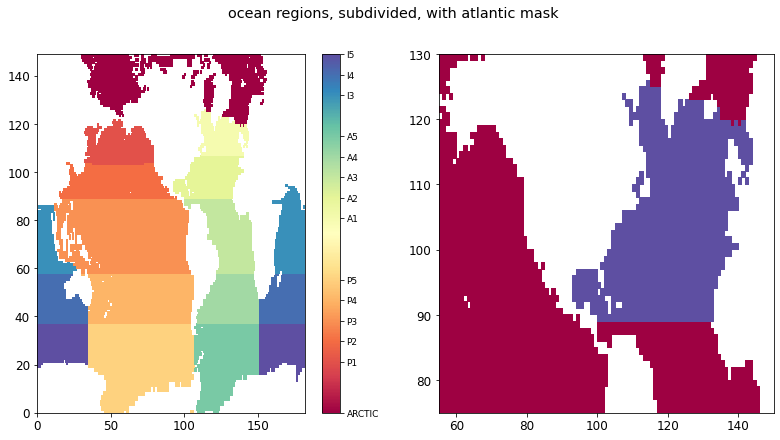

In [5]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

masknoATL = np.copy(maskno)

masknoATL[np.where(masknoATL == 2.6) ]= 5
masknoATL[np.where(masknoATL == 2.4) ]= 5
masknoATL[masknoATL < 5] = 0

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics, ax = axs[0])
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

w = axs[1].pcolor(masknoATL, cmap = tcm, vmin = 0.5, vmax = 4)
axs[1].set_xlim([55,150])
axs[1].set_ylim([75,130])
#cbar = plt.colorbar(w, ticks=tics, ax = axs[0])
#t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided, with atlantic mask')

### AMOC RIV12 code

In [6]:


def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def get_max_amoc(moc_dataset):

    atl_at_26 = np.squeeze(moc_dataset.zomsfatl.sel(y=94).values)
    tshape = np.shape(atl_at_26)
    len_ts = tshape[0]

    max_atl = np.zeros(len_ts)

    for i in range(0,len(max_atl)):
        max_atl[i] = np.nanmax(atl_at_26[i,:])
        
    return max_atl


In [7]:
GEA0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVA0')
GEB0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVB0')
GEC0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVC0')
GED0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVD0')

GEA0_moc = make_yearlist(1959, 2022, 'TOM12_TJ_RVA0')
GEA0_mocdat = xr.open_mfdataset(GEA0_moc) 
GEB0_mocdat = xr.open_mfdataset(GEB0_moc) 
GEC0_mocdat = xr.open_mfdataset(GEC0_moc) 
GED0_mocdat = xr.open_mfdataset(GED0_moc) 

GEA0_max_amoc = get_max_amoc(GEA0_mocdat)
GEB0_max_amoc = get_max_amoc(GEB0_mocdat)
GEC0_max_amoc = get_max_amoc(GEC0_mocdat)
GED0_max_amoc = get_max_amoc(GED0_mocdat)

In [8]:
## obs amoc

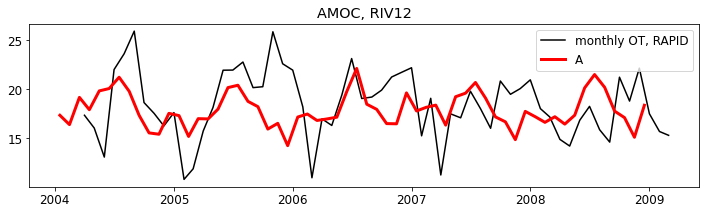

In [9]:

am = xr.open_dataset('./data/mocobs/moc_transports.nc')

nicetime  = GEA0_mocdat.indexes['time_counter'].to_datetimeindex()
fact = 1
yrs = 5

ty = (2004-1959)*12


fig, axs = plt.subplots(1,1, figsize=(12*fact, 3*fact), facecolor='w', edgecolor='k')

monthly_moc = am['moc_mar_hc10'].resample(time='1MS').mean()
axs.plot(monthly_moc.time[0:yrs*12], monthly_moc[0:yrs*12], 'k-', label = 'monthly OT, RAPID')
axs.plot(nicetime[ty:ty+yrs*12], GEA0_max_amoc[ty:ty+yrs*12], label = 'A', color = 'r', lw = 3)
# plt.plot(nicetime, GEB0_max_amoc, label = 'B')
# plt.plot(nicetime, GEC0_max_amoc, label = 'C')
# plt.plot(nicetime, GED0_max_amoc, label = 'D')
plt.title('AMOC, RIV12')
# plt.ylim([14,24])
plt.legend()

### other

### 

In [10]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ex = False

if ex:

    GEA0_ptrc = xr.open_mfdataset(make_yearlist(1990, 2020, 'ptrc','TOM12_TJ_RVA0'))
    GEA0_diad = xr.open_mfdataset(make_yearlist(1990, 2020, 'diad','TOM12_TJ_RVA0'))
    GEA0_grid = xr.open_mfdataset(make_yearlist(1990, 2020, 'grid_T','TOM12_TJ_RVA0'))
    GEA0_gridw = xr.open_mfdataset(make_yearlist(1990, 2020, 'grid_V','TOM12_TJ_RVA0'))
    
    tvars = ['DIC']#'Si', 'Fer', 'NO3','Alkalini','DIA','MIX','COC','PIC','PHA','FIX']
    print('go!')
    for tvar in tvars:
        t = time.time()

        DIC1 = GEA0_ptrc[tvar].mean(dim='time_counter')
        DIC1.to_netcdf(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
        t2 = time.time()
        print(f'{tvar} {t2-t}')
   
#     tvars = ['PPT','EXP','TChl']
#     for tvar in tvars:
#         t = time.time()
#         DIC1 = GEA0_diad[tvar].mean(dim='time_counter')
#         DIC1.to_netcdf(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
#         t2 = time.time()
#         print(f'{tvar} {t2-t}')
        

#     tvars = ['votemper','vosaline']
#     for tvar in tvars:
#         t = time.time()
#         DIC1 = GEA0_grid[tvar].mean(dim='time_counter')
#         DIC1.to_netcdf(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
#         t2 = time.time()
#         print(f'{tvar} {t2-t}')
        
#     tvars = ['vomecrty']
#     for tvar in tvars:
#         t = time.time()
#         DIC1 = GEA0_gridw[tvar].mean(dim='time_counter')
#         DIC1.to_netcdf(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
#         t2 = time.time()
#         print(f'{tvar} {t2-t}')

In [12]:
def make_yearlist_moc(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

GEA0_moc = xr.open_mfdataset(make_yearlist_moc(1990, 2020, 'TOM12_TJ_RVA0'))

In [13]:
GEA0_ptrc = xr.open_dataset(f'./data/GEA0_{tvar}_1990-2020_clim.nc')

NameError: name 'tvar' is not defined

DIC
0.0023320667
0.001645904
NO3
3.0637646e-05
1.4336939e-07
Si
8.773141e-05
6.731785e-14
Fer
2.3245017e-09
1.7742825e-10
vomecrty
0.5058875
-0.151119


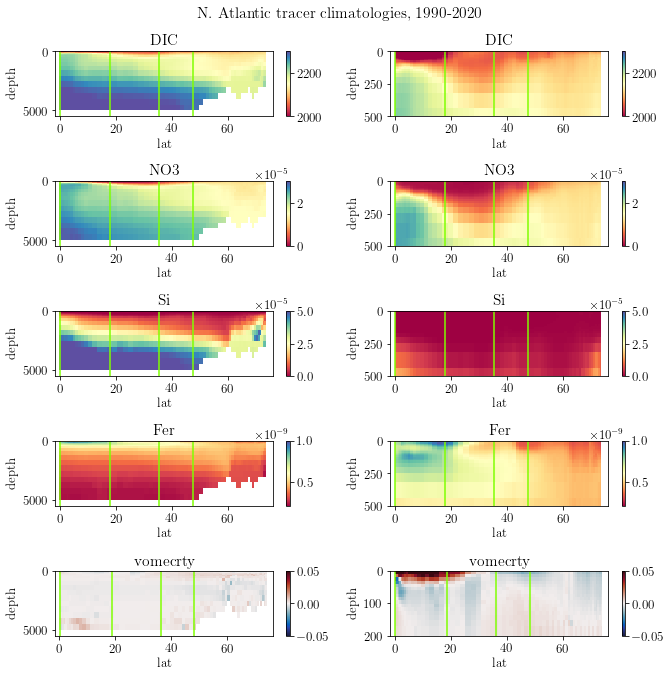

In [14]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)


w = xr.open_dataset('/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/meshmask_with_Atl_broad.nc')

def plot_thing(tvar,vmin,vmax,ind,fact2 =1, cmap = plt.cm.get_cmap('Spectral')):
    
    GEA0_ptrc = xr.open_dataset(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
    DIC = GEA0_ptrc[tvar] * w['ATL'][0,:,:,:].values
    DIC = DIC.where(DIC != 0, np.nan)
    nav_lat = DIC.nav_lat.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)

    DIC_thal = DIC.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)
    DIC = DIC.where(DIC != 0, np.nan)

    Tla = DIC.nav_lat.isel(x=range(80,160)).isel(y=73).\
    mean(dim='x', skipna=True) 
    Lla = DIC.nav_lat.isel(x=range(80,160)).isel(y=90).\
    mean(dim='x', skipna=True)
    Mla = DIC.nav_lat.isel(x=range(80,160)).isel(y=100).\
    mean(dim='x', skipna=True)
    Hla = DIC.nav_lat.isel(x=range(80,160)).isel(y=109).\
    mean(dim='x', skipna=True)
    
    print(tvar)
    print(np.nanmax(DIC));print(np.nanmin(DIC))
    q = axs[0+ind].pcolormesh(nav_lat,DIC.deptht,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[0+ind].invert_yaxis()
    plt.colorbar(q, ax = axs[0+ind])

    axs[1+ind].pcolormesh(nav_lat,DIC.deptht,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[1+ind].set_ylim([0,500])
    axs[1+ind].invert_yaxis()
    
    axs[0+ind].axvline(Tla, color = 'chartreuse')
    axs[0+ind].axvline(Lla, color = 'chartreuse')
    axs[0+ind].axvline(Mla, color = 'chartreuse')
    axs[0+ind].axvline(Hla, color = 'chartreuse')
    axs[1+ind].axvline(Tla, color = 'chartreuse')
    axs[1+ind].axvline(Lla, color = 'chartreuse')
    axs[1+ind].axvline(Mla, color = 'chartreuse')
    axs[1+ind].axvline(Hla, color = 'chartreuse')
    
    plt.colorbar(q, ax = axs[1+ind])

def plot_vomecrty(tvar,vmin,vmax,ind,fact2 =1, cmap = plt.cm.get_cmap('Spectral')):
    
    GEA0_ptrc = xr.open_dataset(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
    DIC = GEA0_ptrc[tvar] * w['ATL'][0,:,:,:].values
    DIC = DIC.where(DIC != 0, np.nan)
    nav_lat = DIC.nav_lat.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)

    DIC_thal = DIC.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)
    DIC = DIC.where(DIC != 0, np.nan)

    Tla = DIC.nav_lat.isel(x=range(80,160)).isel(y=73).\
    mean(dim='x', skipna=True) 
    Lla = DIC.nav_lat.isel(x=range(80,160)).isel(y=90).\
    mean(dim='x', skipna=True)
    Mla = DIC.nav_lat.isel(x=range(80,160)).isel(y=100).\
    mean(dim='x', skipna=True)
    Hla = DIC.nav_lat.isel(x=range(80,160)).isel(y=109).\
    mean(dim='x', skipna=True)
    
    print(tvar)
    print(np.nanmax(DIC));print(np.nanmin(DIC))
    q = axs[0+ind].pcolormesh(nav_lat,DIC.depthv,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[0+ind].invert_yaxis()
    plt.colorbar(q, ax = axs[0+ind])

    axs[1+ind].pcolormesh(nav_lat,DIC.depthv,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[1+ind].set_ylim([0,200])
    axs[1+ind].invert_yaxis()
    
    axs[0+ind].axvline(Tla, color = 'chartreuse')
    axs[0+ind].axvline(Lla, color = 'chartreuse')
    axs[0+ind].axvline(Mla, color = 'chartreuse')
    axs[0+ind].axvline(Hla, color = 'chartreuse')
    axs[1+ind].axvline(Tla, color = 'chartreuse')
    axs[1+ind].axvline(Lla, color = 'chartreuse')
    axs[1+ind].axvline(Mla, color = 'chartreuse')
    axs[1+ind].axvline(Hla, color = 'chartreuse')
    
    plt.colorbar(q, ax = axs[1+ind])

cmap = plt.cm.get_cmap('Spectral')
fact = 0.8
fig, axs = plt.subplots(5,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tvar = 'DIC'; tvmin = 2000; tvmax = 2300; ind = 0
plot_thing(tvar,tvmin,tvmax,ind,1e6)
tvar = 'NO3'; tvmin = 0; tvmax = 3e-5; ind = 2
plot_thing(tvar,tvmin,tvmax,ind)
tvar = 'Si'; tvmin = 0; tvmax = 5e-5; ind = 4
plot_thing(tvar,tvmin,tvmax,ind)
tvar = 'Fer'; tvmin = 2e-10; tvmax = 1e-9; ind = 6
plot_thing(tvar,tvmin,tvmax,ind)
tvar = 'vomecrty'; tvmin = -0.05; tvmax = 0.05; ind = 8
plot_vomecrty(tvar,tvmin,tvmax,ind, cmap = cm.balance)


ttit = ['DIC','DIC','NO3','NO3','Si','Si','Fer','Fer','vomecrty','vomecrty']

for t in range(0,10):
    axs[t].set_title(ttit[t])
    axs[t].set_xlabel('lat')
    axs[t].set_ylabel('depth')

    
plt.suptitle('N. Atlantic tracer climatologies, 1990-2020')
plt.tight_layout()


(31, 149, 182)
FIX
8.644289e-06
4.1223615e-11
DIA
3.2339801e-06
2.0734188e-18
MIX
4.6187574e-06
9.20737e-17
COC
3.4092652e-06
4.1353736e-21
PIC
2.018872e-06
3.2392565e-12
PHA
1.1591202e-06
1.3799889e-12
FIX
3.2373587e-06
8.586749e-12


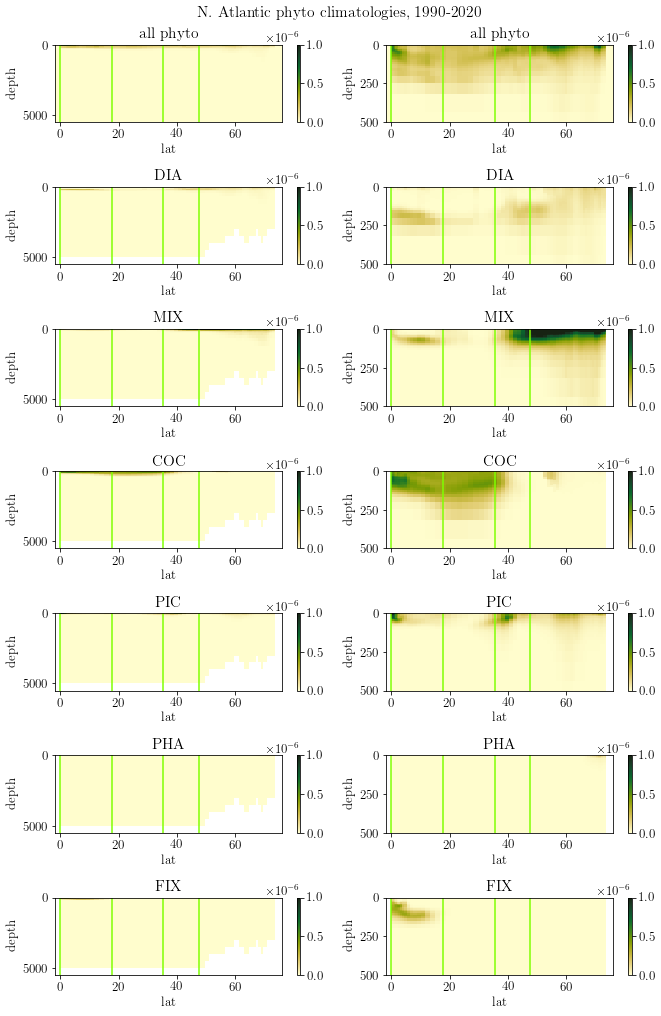

In [15]:
def plot_phyt(vmin,vmax,ind,fact2 =1):
    
    cmap = cm.speed
    
    tvar = 'DIA'
    GEA0_ptrc = xr.open_dataset(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
    DIC = GEA0_ptrc[tvar] * w['ATL'][0,:,:,:]
    
    tvars = ['DIA','MIX','COC','PIC','PHA','FIX']
    for tvar in tvars:
        GEA0_ptrc = xr.open_dataset(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
        DIC = DIC + GEA0_ptrc[tvar] * w['ATL'][0,:,:,:]
    
    #DIC = DIC.where(DIC != 0, np.nan)
    print(np.shape(DIC))
    nav_lat = DIC.nav_lat.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)

    DIC_thal = DIC.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)
    DIC = DIC.where(DIC != 0, np.nan)

    Tla = DIC.nav_lat.isel(x=range(80,160)).isel(y=73).\
    mean(dim='x', skipna=True) 
    Lla = DIC.nav_lat.isel(x=range(80,160)).isel(y=90).\
    mean(dim='x', skipna=True)
    Mla = DIC.nav_lat.isel(x=range(80,160)).isel(y=100).\
    mean(dim='x', skipna=True)
    Hla = DIC.nav_lat.isel(x=range(80,160)).isel(y=109).\
    mean(dim='x', skipna=True)
    
    print(tvar)
    print(np.nanmax(DIC));print(np.nanmin(DIC))
    q = axs[0+ind].pcolormesh(nav_lat,DIC.deptht,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[0+ind].invert_yaxis()
    plt.colorbar(q, ax = axs[0+ind])

    axs[1+ind].pcolormesh(nav_lat,DIC.deptht,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[1+ind].set_ylim([0,500])
    axs[1+ind].invert_yaxis()
    
    axs[0+ind].axvline(Tla, color = 'chartreuse')
    axs[0+ind].axvline(Lla, color = 'chartreuse')
    axs[0+ind].axvline(Mla, color = 'chartreuse')
    axs[0+ind].axvline(Hla, color = 'chartreuse')
    axs[1+ind].axvline(Tla, color = 'chartreuse')
    axs[1+ind].axvline(Lla, color = 'chartreuse')
    axs[1+ind].axvline(Mla, color = 'chartreuse')
    axs[1+ind].axvline(Hla, color = 'chartreuse')
    
    plt.colorbar(q, ax = axs[1+ind])
    
        
    
cmap = cm.matter
fact = 0.8
fig, axs = plt.subplots(7,2, figsize=(12*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
    
tvmin = 0; tvmax = 1e-6; ind = 0
plot_phyt(tvmin,tvmax,ind)
#['DIA','MIX','COC','PIC','PHA','FIX']
tvar = 'DIA'; ind = 2
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
tvar = 'MIX'; ind = 4
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
tvar = 'COC'; ind = 6
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
tvar = 'PIC'; ind = 8
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
tvar = 'PHA'; ind = 10
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
tvar = 'FIX'; ind = 12
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
# tvar = 'Si'; tvmin = 0; tvmax = 5e-5; ind = 4
# plot_thing(tvar,tvmin,tvmax,ind)
# tvar = 'Fer'; tvmin = 2e-10; tvmax = 1e-9; ind = 6
# plot_thing(tvar,tvmin,tvmax,ind)

ttit = ['all phyto','DIA','MIX','COC','PIC','PHA','FIX']

for t in range(0,7):
    axs[t*2].set_title(ttit[t])
    axs[t*2].set_xlabel('lat')
    axs[t*2].set_ylabel('depth')

    axs[t*2+1].set_title(ttit[t])
    axs[t*2+1].set_xlabel('lat')
    axs[t*2+1].set_ylabel('depth')
    
plt.suptitle('N. Atlantic phyto climatologies, 1990-2020')
plt.tight_layout()

DIC
0.0023320667
0.001645904
Alkalini
0.0024990232
0.0017788032
(31, 149, 182)
Alkalini
0.00038525183
5.611265e-05


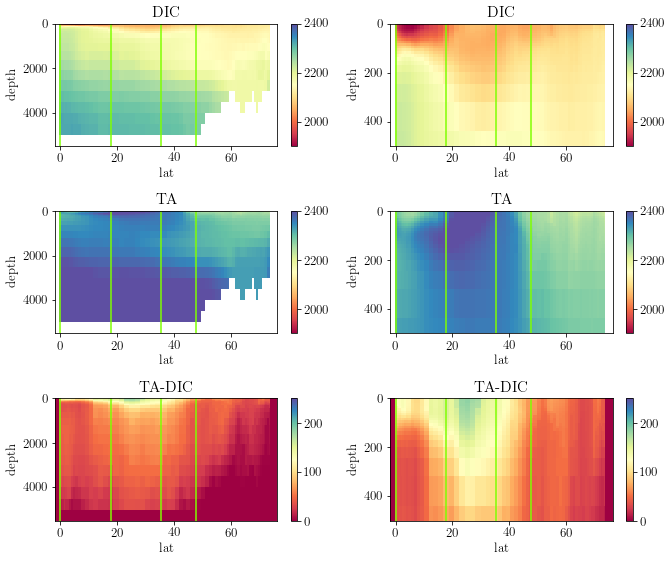

In [16]:
def plot_TADIC(vmin,vmax,ind,fact2 =1e6):
    
    cmap = plt.cm.get_cmap('Spectral')
    
    tvar = 'DIC'
    GEA0_ptrc = xr.open_dataset(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
    DIC1 = GEA0_ptrc[tvar] * w['ATL'][0,:,:,:]

    tvar = 'Alkalini'
    GEA0_ptrc = xr.open_dataset(f'./data/RVA0_{tvar}_1990-2020_clim.nc')
    DIC2 = GEA0_ptrc[tvar] * w['ATL'][0,:,:,:]
    
    DIC = DIC2-DIC1
    
    #DIC = DIC.where(DIC != 0, np.nan)
    print(np.shape(DIC))
    nav_lat = DIC.nav_lat.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)

    DIC_thal = DIC.isel(x=range(80,160)).isel(y=range(70,149)).\
    mean(dim='x', skipna=True)
    DIC = DIC.where(DIC != 0, np.nan)

    Tla = DIC.nav_lat.isel(x=range(80,160)).isel(y=73).\
    mean(dim='x', skipna=True) 
    Lla = DIC.nav_lat.isel(x=range(80,160)).isel(y=90).\
    mean(dim='x', skipna=True)
    Mla = DIC.nav_lat.isel(x=range(80,160)).isel(y=100).\
    mean(dim='x', skipna=True)
    Hla = DIC.nav_lat.isel(x=range(80,160)).isel(y=109).\
    mean(dim='x', skipna=True)
    
    print(tvar)
    print(np.nanmax(DIC));print(np.nanmin(DIC))
    q = axs[0+ind].pcolormesh(nav_lat,DIC.deptht,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[0+ind].invert_yaxis()
    plt.colorbar(q, ax = axs[0+ind])

    axs[1+ind].pcolormesh(nav_lat,DIC.deptht,DIC_thal*fact2, cmap = cmap, vmin = tvmin, vmax = tvmax)
    axs[1+ind].set_ylim([0,500])
    axs[1+ind].invert_yaxis()
    
    axs[0+ind].axvline(Tla, color = 'chartreuse')
    axs[0+ind].axvline(Lla, color = 'chartreuse')
    axs[0+ind].axvline(Mla, color = 'chartreuse')
    axs[0+ind].axvline(Hla, color = 'chartreuse')
    axs[1+ind].axvline(Tla, color = 'chartreuse')
    axs[1+ind].axvline(Lla, color = 'chartreuse')
    axs[1+ind].axvline(Mla, color = 'chartreuse')
    axs[1+ind].axvline(Hla, color = 'chartreuse')
    
    plt.colorbar(q, ax = axs[1+ind])
    
    
cmap = cm.matter
fact = 0.8
fig, axs = plt.subplots(3,2, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
   
tvar = 'DIC'; 
tvmin = 1900; tvmax = 2400; ind = 0
plot_thing(tvar,tvmin,tvmax,ind, fact2 = 1e6)
tvar = 'Alkalini'; ind = 2
plot_thing(tvar,tvmin,tvmax,ind, fact2 = 1e6)
ind = 4
tvmin = 00; tvmax = 250
plot_TADIC(tvmin,tvmax,ind)

ttit = ['DIC','TA','TA-DIC']

for t in range(0,3):
    axs[t*2].set_title(ttit[t])
    axs[t*2].set_xlabel('lat')
    axs[t*2].set_ylabel('depth')

    axs[t*2+1].set_title(ttit[t])
    axs[t*2+1].set_xlabel('lat')
    axs[t*2+1].set_ylabel('depth')
    
plt.tight_layout()

PPT
3.9252768e-08
2.22746e-40
EXP
1.9717929e-07
5.491943e-10
TChl
1.009733e-06
5.4603874e-12


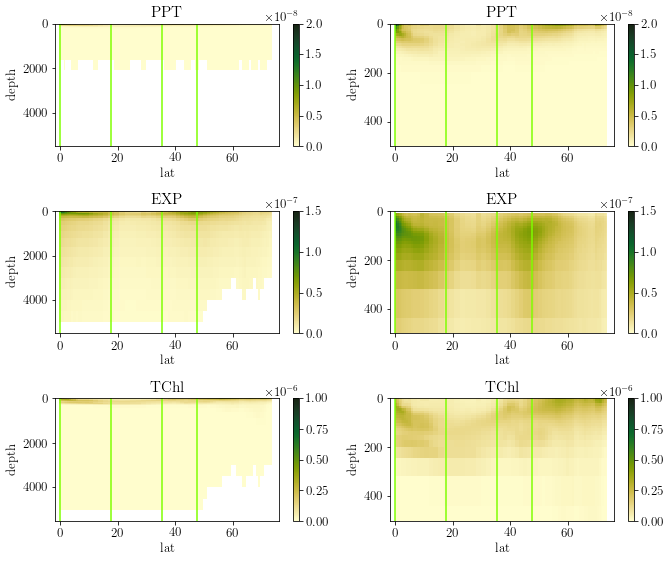

In [19]:
cmap = cm.matter
fact = 0.8
fig, axs = plt.subplots(3,2, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tvmin = 0; tvmax = 2e-8
tvar = 'PPT'; ind = 0
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
tvmin = 0; tvmax = 1.5e-7
tvar = 'EXP'; ind = 2
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)
tvmin = 0; tvmax = 1e-6
tvar = 'TChl'; ind = 4
plot_thing(tvar,tvmin,tvmax,ind, cmap = cm.speed)

ttit = ['PPT','EXP','TChl']

for t in range(0,3):
    axs[t*2].set_title(ttit[t])
    axs[t*2].set_xlabel('lat')
    axs[t*2].set_ylabel('depth')

    axs[t*2+1].set_title(ttit[t])
    axs[t*2+1].set_xlabel('lat')
    axs[t*2+1].set_ylabel('depth')
    
plt.tight_layout()

In [18]:
def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

(31,)


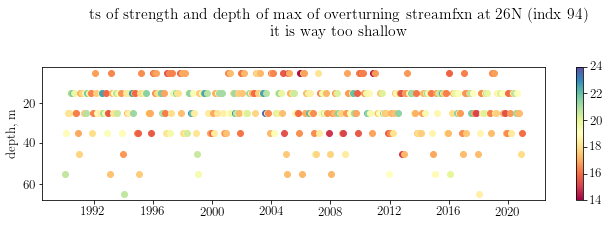

In [77]:
w = make_yearlist(1990, 2020, 'TOM12_TJ_RVA0', baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/')
w = xr.open_mfdataset(w)

def get_max_amoc(moc_dataset):

    atl_at_26 = np.squeeze(moc_dataset.zomsfatl.sel(y=94).values)
    tshape = np.shape(atl_at_26)
    len_ts = tshape[0]

    max_atl = np.zeros(len_ts)
    d_atl = np.zeros(len_ts)

    for i in range(0,len(max_atl)):
        max_atl[i] = np.nanmax(atl_at_26[i,:])
        d_atl[i] = np.where(atl_at_26[i,:] == np.nanmax(atl_at_26[i,:]) )[0]
        
    return max_atl, d_atl

max_atl, d_atl = get_max_amoc(w)

nicetime  = w.indexes['time_counter'].to_datetimeindex()

q = xr.open_dataset('/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_RVA0/ORCA2_1m_19660101_19661231_ptrc_T.nc')
nav_lat = q.nav_lat.isel(x=range(80,160)).\
    mean(dim='x', skipna=True)
dd = q.deptht.values
print(np.shape(dd))



fig, ax = plt.subplots(1,1, figsize=(12*fact,4*fact), facecolor='w', edgecolor='k')

for i in range(0, len(max_atl)):
    td = dd[int(d_atl[i])]
    kr = plt.scatter(nicetime[i],td, c = max_atl[i], cmap = plt.cm.get_cmap('Spectral'), vmin = 14, vmax = 24)
plt.colorbar(kr)
ax.invert_yaxis()
plt.suptitle('ts of strength and depth of max of overturning streamfxn at 26N (indx 94) \n it is way too shallow')
plt.ylabel('depth, m')
plt.tight_layout()

In [61]:
atl_at_26 = np.squeeze(w.zomsfatl.sel(y=94).values)
np.shape(atl_at_26)
i = 0
max_atl[i] = np.nanmax(atl_at_26[i,:])
d_atl = np.where(atl_at_26[i,:] == np.nanmax(atl_at_26[i,:]) )[0]
print(d_atl)

[5]


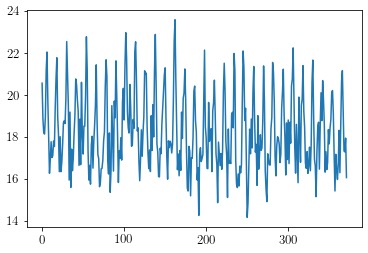

In [52]:
plt.plot(max_atl)

Text(0.5, 0.98, 'AMOC climatology, 1990-2020. \n things are a bit too near the surface.')

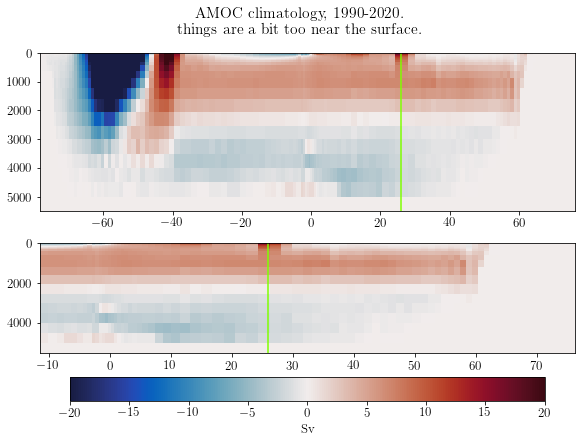

In [50]:
AMOC_sf = w.zomsfatl.isel(x=0).mean(dim='time_counter')


q = xr.open_dataset('/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_RVA0/ORCA2_1m_19660101_19661231_ptrc_T.nc')
nav_lat = q.nav_lat.isel(x=range(80,160)).\
    mean(dim='x', skipna=True)
dd = q.deptht.values

fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].pcolormesh(nav_lat,dd,AMOC_sf, vmin = -20, vmax = 20, cmap = cm.balance)
axs[0].invert_yaxis()

q= axs[1].pcolormesh(nav_lat[60:-1],dd,AMOC_sf[:,60:-1], vmin = -20, vmax = 20, cmap = cm.balance)
axs[1].invert_yaxis()


axs[0].axvline(x = 26, color = 'chartreuse')
axs[1].axvline(x = 26, color = 'chartreuse')
plt.colorbar(q,orientation = 'horizontal', label = 'Sv', ax = axs[1])

plt.suptitle('AMOC climatology, 1990-2020. \n things are a bit too near the surface.')